In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon, chi2, gaussian_kde

In [58]:
X = np.genfromtxt("time_until_phone_drop.csv")

n = len(X)
mean = np.mean(X)
std = np.std(X)

In [59]:
# Using the mean value method?
theta_mm = 1 / mean
print(f'Using the mean value method, the best value is: {theta_mm}')

Using the mean value method, the best value is: 1.1184568874015897


In [60]:
# Using gradient descent
def log_likelihood(theta):
    return n * np.log(theta) - theta * np.sum(X)

def delta_log_likelihood(theta):
    return (n/theta - np.sum(X))

theta_gd = 2
learning_rate = 0.0001

for i in range(100):
    theta_gd = theta_gd + learning_rate * delta_log_likelihood(theta_gd)

print(f'Using gradient descent, the best value is: {theta_gd}')

Using gradient descent, the best value is: 1.1189517329257708


In [61]:
# get the probability that someone drops their phone in 2 years
prob = expon.cdf(2, 0, mean)
print(f"probability of phone drop in 2 years: {prob}")

# get the years until 90 percent of population drops phone
prob = expon.ppf(0.9, 0, mean)
print(f"90% of population will drop phone in {prob} years")

probability of phone drop in 2 years: 0.89321243318291
90% of population will drop phone in 2.0587160032099536 years


Text(0.5, 1.0, 'Phone drop histogram')

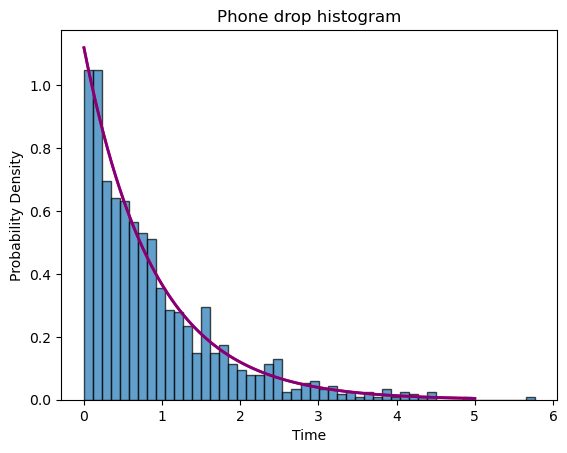

In [62]:
# plotting
plt.hist(X, bins=50, density=True, alpha=0.7, edgecolor="black")

# Using theta_mm
x = np.linspace(0, 5, 100)
y = theta_mm * np.exp(-theta_mm * x)
plt.plot(x, y, color='red', linewidth=2)

# Using theta_gd
x = np.linspace(0, 5, 100)
y = theta_gd * np.exp(-theta_gd * x)
plt.plot(x, y, color='purple', linewidth=2)

plt.xlabel("Time")
plt.ylabel("Probability Density")
plt.title("Phone drop histogram")

# KDE Practice

In [ ]:
# random seed for reproducability
np.random.seed(0)

# chi square dist params
df = 5

num_samples = 1000
samples = np.random.chisquare(df, num_samples)